<a href="https://colab.research.google.com/github/geovaniGomes/geovaniGomes/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Atualmente, o principal meio de pagamento adotado por consumidores é o cartão. Seja de crédito ou débito, a facilidade e segurança são vantagens levadas em conta por clientes na hora de pagar suas compras. 

Portanto, para o varejista é imprescindível contar com estratégias para controlar essas vendas e impedir que possa acontecer alguma fraude em cartão de crédito.

Como a quantidade de vendas realizadas em cartão cresce a cada dia, aumenta também o interesse em fraudar esse processo e tirar vantagem em alguma situação. 

Cabe ao varejista o monitoramento constante e a adoção de processos para evitar que a fraude em cartão de crédito aconteça e prejudique suas vendas.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# caso você não tem essa biblioteca instalada use o comando abaixo.
!pip install imblearn -q

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from mlxtend.classifier import EnsembleVoteClassifier

from sklearn import (
    model_selection,
    preprocessing,
    linear_model,
    ensemble,
    naive_bayes,
    tree
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [4]:
# Visualizando as 5 primeiras linhas 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Resumo estatístico do Dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Visualizando valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

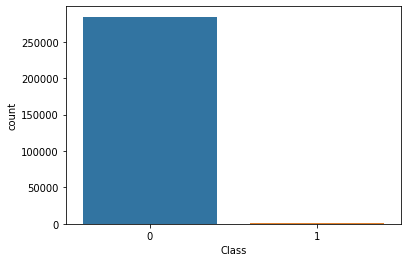

In [6]:
# Plotar um gráfico de barras (ou countplot) para ver o balanceamento do dataset
sns.countplot(x="Class", data=df)

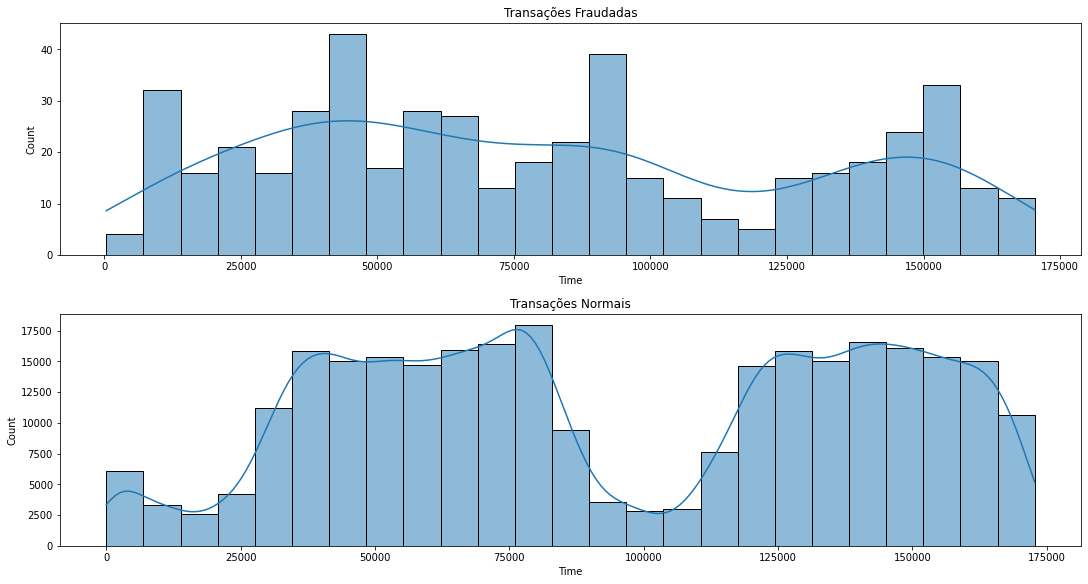

In [7]:
# Definindo DataFrames separados por tipo de transação
df_transacoes_fraudadas = df[df['Class']==1]
df_transacoes_normais = df[df['Class']==0]

# Definindo subplots para os plots de histrogramas.
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), constrained_layout=True)
ax1.set_title("Transações Fraudadas")
sns.histplot(data=df_transacoes_fraudadas, x="Time", bins=25, ax=ax1, kde=True)

ax2.set_title("Transações Normais")
sns.histplot(data=df_transacoes_normais, x="Time", bins=25, ax=ax2, kde=True)
plt.show()

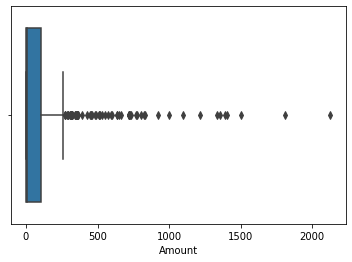

In [9]:
# Visualizando outliers dos valores quando a transação quando a transação for fraudada
sns.boxplot(data=df_transacoes_fraudadas, x='Amount');

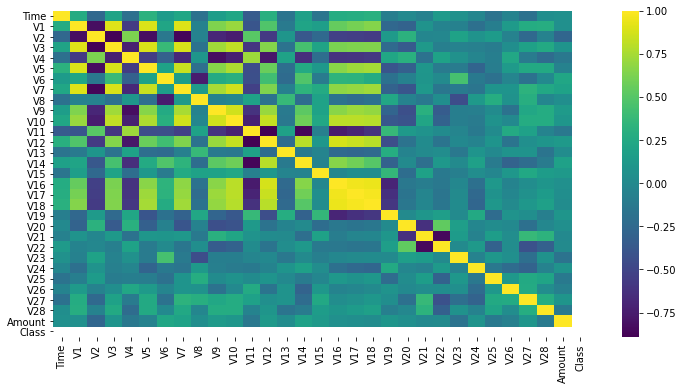

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df_transacoes_fraudadas.corr(), cmap='viridis');

## Limpesa dos dados

In [12]:
class DataClean(object):

  def copy_dataFrame(self,data_frame):    
    return data_frame.copy()
  
  def remove_outliers(self, df, column_name):
    low = np.quantile(df[column_name], 0.05)
    high = np.quantile(df[column_name], 0.95)
    return df[df[column_name].between(low, high, inclusive=True)]

clean_data =DataClean()

In [14]:
data = (df.pipe(clean_data.copy_dataFrame)
          .pipe(clean_data.remove_outliers,'Time')
          .pipe(clean_data.remove_outliers, 'Amount'))

No processo acima foi definido um pipe que aplica funções de remover outliers
das variáveis Time e Amount. Isso vai ajudar no pré-processamento quando for aplicar o StandardScaler. Já que o mesmo é sensível aos outliers.

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

In [20]:
class PreProcessing(object):

  def standard_scaler(self, X_train):
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train
  
  def split_feature_matrix_target_vector(self, data_frame, target):
    x = data_frame.drop(target, axis=1)
    y = data_frame[target]
    data_feature ={
        'X': x,
        'y': y
    }
    return data_feature

  def train_test_spint(self, data_feature, test_size =None):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data_feature['X'],
                                                                        data_feature['y'],
                                                                        test_size=test_size)

    data_split={'X_train':X_train,
                'X_test': X_test,
                'y_train': y_train,
                'y_test': y_test}
    return data_split

  def under_sampling_nearMiss(self,data_feature):
   nr = NearMiss()
   data_feature['X'], data_feature['y'] = nr.fit_sample(data_feature['X'],
                                          data_feature['y'])
   return data_feature
    

pre_processing = PreProcessing() 

In [21]:
# Separando os dados em X e y
data_feature = pre_processing.split_feature_matrix_target_vector(data, 'Class')

## Tratando as classes desbalanceadas

Uma situação que geralmente modelos de classificação são se sai bem são as classes desbalanceadas.

Se você estiver classificando dados e as classes não estiverem relativamente balanceadas quanto ao tamanho, a distorção em direção às classes mais populares poderão transparecer em seu modelo.Ou seja, classes que contém mais representações poderão ser classificadas com mais frequência ocasionando então os falsos positivos.

É  quando o modelo classifica um valor quando na verdade era para ser outro valor. Veremos isso na matriz de confusão mais adiante.


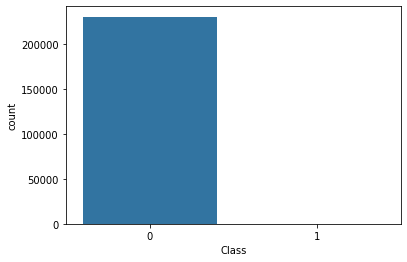

In [22]:
# plotando as classes desbalanceadas.
ax = sns.countplot(x=data_feature['y'])

A técnica que utilizaremos é o Undersampling. Que visa reduzir valores da classe majoritária deixando então o dataset mais igualitário. Para isso vamos usar o Near Miss.Consiste em reduzir de forma aleatória os exemplos da classe majoritária. Porém ele tenta manter a separabilidade entre as classes.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


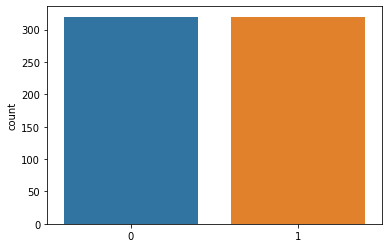

In [23]:
data_feature = pre_processing.under_sampling_nearMiss(data_feature);
ax = sns.countplot(x=data_feature['y']);

In [24]:
data_split = pre_processing.train_test_spint(data_feature)

## Modelo de Machine Learning

Como se trata um problema de classificação, iremos avaliar os seguintes modelos:

* Logistic Regression
* Gradient Boosting
* Random Forest
* AdaBoost
* Decision Tree
* GaussianNB

Ambos modelos terão seus parâmetros por default. Ou seja, somente sua instância com parâmetros pré definidos. A ideia é avaliar o modelo mais simples para um mais robusto. E avaliar seus desempenhos.


In [85]:
class ModelClassification(object):

  def __init__(self):
    self.modelos = []
    self.Logistic_regression = linear_model.LogisticRegression(max_iter=1000)
    self.Gradient_boosting = ensemble.GradientBoostingClassifier()
    self.Random_florest = ensemble.RandomForestClassifier()
    self.Ada_boost = ensemble.AdaBoostClassifier()
    self.Decission_tree = tree.DecisionTreeClassifier()
    self.GaussianNB = naive_bayes.GaussianNB()

    self.modelos.append(('Logistic_regression', self.Logistic_regression))
    self.modelos.append(('Gradient_boosting', self.Gradient_boosting))
    self.modelos.append(('Random_florest',self.Random_florest))
    self.modelos.append(('Ada_boost',self.Ada_boost))
    self.modelos.append(('Decission_tree', self.Decission_tree))
    self.modelos.append(('GaussianNB', self.GaussianNB))
  
  def predict_all_models(self, data_split):

    dados_predict ={
        'Modelos':[],
        'modelo_name':[],
        'y_pred':[]}

    for nome, modelo in self.modelos:
      modelo.fit(data_split['X_train'], data_split['y_train'])
      y_pred = modelo.predict(data_split['X_test'])
      dados_predict['modelo_name'].append(nome)
      dados_predict['y_pred'].append(y_pred)

    dados_predict['Modelos'].append(self.modelos)
    return dados_predict

  def classification_report(self,models, y_test, y_pred):
       array_models = range(0, len(models))
       print('===Relatório de classificação===')

       for model in array_models:
          print(f"Modelo: {models[model]}")
          print(classification_report( y_test, y_pred[model]))
   
  def confusion_matrix(self, dados_predict,y_test):
     
     array_models = range(0, len(dados_predict['Modelos'][0]))
     idx = 0
     fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
     fig.subplots_adjust(hspace=1, wspace=1)

     for model in array_models:
        idx += 1
        plt.subplot(2, 3, idx)
        sns.heatmap(confusion_matrix(y_test, dados_predict['y_pred'][model]), annot=True)
        plt.title(dados_predict['modelo_name'][model], fontsize=10)
        plt.xlabel("Previsto")
        plt.ylabel("Verdadeiro")      
     plt.tight_layout()
classification_model = ModelClassification()

In [87]:
dados_predict = classification_model.predict_all_models(data_split)

### Classification Report

In [37]:
classification_model.classification_report(dados_predict['modelo_name'], data_split['y_test'],dados_predict['y_pred'])

===Relatório de classificação===
Modelo: Logistic_regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        87
           1       0.99      0.97      0.98        73

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160

Modelo: Gradient_boosting
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        87
           1       1.00      0.97      0.99        73

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

Modelo: Random_florest
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        87
           1       1.00      0.96      0.98        73

    accuracy                           0.98       160
   macro avg      

No geral, os modelos se saíram bem. Todos eles teveram uma acurácia acima dos 90% e o Recall acima dos 95%.

Lembrando que o recall (revocação) é a porcentagem de valores positivos classificados corretament.

### Confusion Matrix

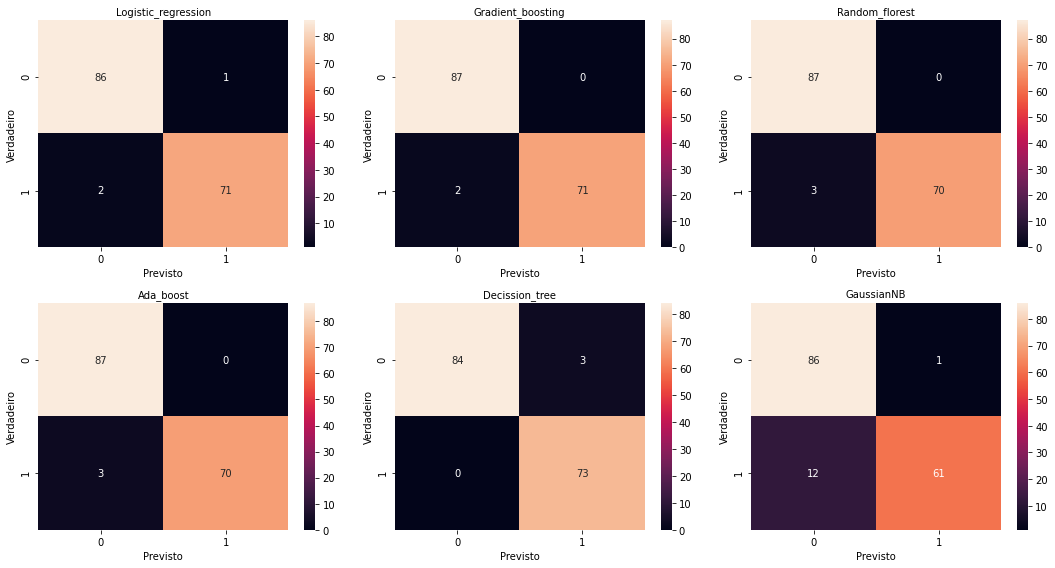

In [88]:
classification_model.confusion_matrix(dados_predict, data_split['y_test'])

## Avaliar o desempenho do modelo

Apesar do balanceamento de classes que fizemos na etapa de pré-processamento, nossos modelos deram resultados falsos positivos. Apesar da accuracy ser alta.

Para avaliar esses modelos, não iremos usar a pontuação de acurácia, mas sim a AUC.

A curva AUC é derivada da curva ROC, então vamos inicialmente entender a curva ROC. A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
Quanto maior o AUC, melhor.


In [38]:
class EvaluateModel(object):

  def roc_auc_score(self,  y_test,data_predict):
    array_models = range(0, len(data_predict['Modelos'][0]))
    print("=== Avaliação de pesempenho AUC")
    print('\n')
    
    for model in array_models:
        print(f"Modelo: {data_predict['modelo_name'][model] }")
        print("AUC: {:.4f}\n".format(roc_auc_score(y_test,data_predict['y_pred'][model]))) 
evalue_model = EvaluateModel()

In [89]:
evalue_model.roc_auc_score(data_split['y_test'], dados_predict)

=== Avaliação de pesempenho AUC


Modelo: Logistic_regression
AUC: 0.9806

Modelo: Gradient_boosting
AUC: 0.9863

Modelo: Random_florest
AUC: 0.9795

Modelo: Ada_boost
AUC: 0.9795

Modelo: Decission_tree
AUC: 0.9828

Modelo: GaussianNB
AUC: 0.9121



## Conclusão

Os dados disponíveis, já tinha passaso por algum tipo de pre-processamento. Concluíndo então que os dados estão normalizados.O que fizemos foi remover alguns outliers nas colunas Time e Amount para  alplicar o StandardScaler que não tinha aplicado a técnica previamente.


Todos os modelos foram treinados com 70% dos dados em treino e 30% em teste. No modo geral como dito na etapa de relatório de classíficação ambos modelos se saíram muito bem. Apesar que ambos foram criados com parâmetros pré-definidos.


A determinar o melhor modelo nesse cenários, usamos a métrica de curva AUC. E o melhor nessa métrica com este cenário de configuração de modelos, foi Dession tree com 0.9828 de AUC.

Caso for utilizar hiperparâmetros nos modelos, pode ser que o resultado seja um pouco diferente.

